In [2]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

Loading the `dataset_TipAu_SiO2.npz` dataset.

In [3]:
curvas_ausi = np.load("dataset_TipAu_SiO2.npz")
curvas_auau = np.load("dataset_TipAu_Au.npz")
curvas_ligcl = np.load("dataset_TipLig_CL.npz")
curvas_ligsi = np.load("dataset_TipLig_SiO2.npz")

forca_ausi = curvas_ausi['vDeflection_N']
furca_auau = curvas_auau['vDeflection_N']
forca_ligcl = curvas_ligcl['vDeflection_N']
forca_ligsi = curvas_ligsi['vDeflection_N']

For the next couple of analysis, the Continuous Wavelet Transform (CWT) is going to be used.

In [6]:
try:
    wavelets = np.load('cwt_morl.npz')['wavelets']

except:
    scales = np.arange(1, 128)
    wavelet = pywt.ContinuousWavelet('morl')
    
    num_idx = 1024
    wavelets = []
    
    for idx in range(num_idx):
        coef, freqs = pywt.cwt(forca_ausi[idx], scales, wavelet)
        wavelets.append(np.abs(coef))
    
    wavelets = np.array(wavelets)
    np.savez('cwt_morl_ausi.npz', wavelets=wavelets)

In [7]:
try:
    wavelets = np.load('cwt_morl.npz')['wavelets']

except:
    scales = np.arange(1, 128)
    wavelet = pywt.ContinuousWavelet('morl')
    
    num_idx = 1024
    wavelets = []
    
    for idx in range(num_idx):
        coef, freqs = pywt.cwt(furca_auau[idx], scales, wavelet)
        wavelets.append(np.abs(coef))
    
    wavelets = np.array(wavelets)
    np.savez('cwt_morl_auau.npz', wavelets=wavelets)

In [8]:
try:
    wavelets = np.load('cwt_morl.npz')['wavelets']

except:
    scales = np.arange(1, 128)
    wavelet = pywt.ContinuousWavelet('morl')
    
    num_idx = 1024
    wavelets = []
    
    for idx in range(num_idx):
        coef, freqs = pywt.cwt(forca_ligcl[idx], scales, wavelet)
        wavelets.append(np.abs(coef))
    
    wavelets = np.array(wavelets)
    np.savez('cwt_morl_ligcl.npz', wavelets=wavelets)

In [9]:
try:
    wavelets = np.load('cwt_morl.npz')['wavelets']

except:
    scales = np.arange(1, 128)
    wavelet = pywt.ContinuousWavelet('morl')
    
    num_idx = 1024
    wavelets = []
    
    for idx in range(num_idx):
        coef, freqs = pywt.cwt(forca_ligsi[idx], scales, wavelet)
        wavelets.append(np.abs(coef))
    
    wavelets = np.array(wavelets)
    np.savez('cwt_morl_ligsi.npz', wavelets=wavelets)

## PCA visualization

In [7]:
from sklearn.decomposition import PCA

To better explore the datasets, the wavelets and the force curves will be reduced in dimensionality via Principal Component Analysis (PCA). Plotting the wavelets.

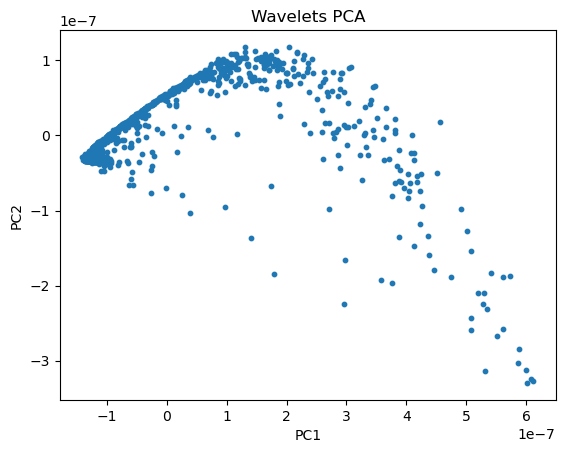

In [8]:
wavelets_flatten = np.array([w.ravel() for w in wavelets])

pca = PCA(n_components=2)  
wavelets_pca = pca.fit_transform(wavelets_flatten)

plt.scatter(wavelets_pca[:, 0], wavelets_pca[:, 1], s=10.)
plt.title('Wavelets PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Doing the same for the force curves.

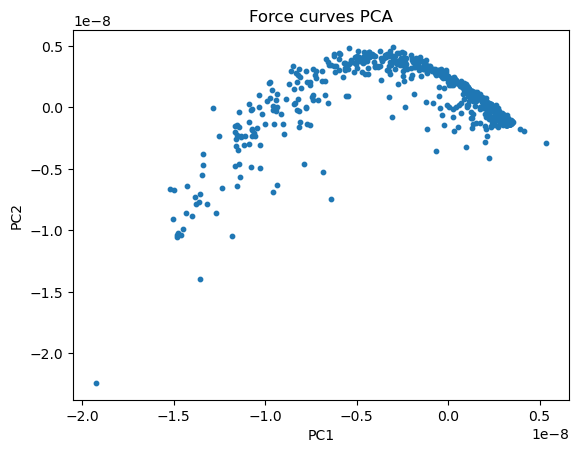

In [9]:
curves_flatten = np.array([c.ravel() for c in curves])

pca = PCA(n_components=2)  
curves_pca = pca.fit_transform(curves_flatten)

plt.scatter(curves_pca[:, 0], curves_pca[:, 1], s=10.)
plt.title('Force curves PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

To visualize the simmilarities between the previous plots, each data will be normalized by its maximum value, and plotted on the same plane. Note that each data has different principal components (PCs), so the plot only serves as a shape comparison.

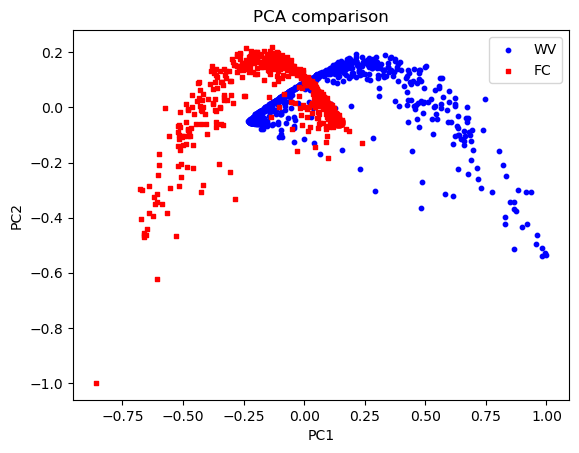

In [10]:
wavelets_pca /= np.abs(wavelets_pca).max()
curves_pca /= np.abs(curves_pca).max()

plt.scatter(wavelets_pca[:, 0], wavelets_pca[:, 1], s=10., c='blue', marker='o', label='WV')
plt.scatter(curves_pca[:, 0], curves_pca[:, 1], s=10., c='red', marker='s', label='FC')

plt.legend()
plt.title('PCA comparison')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## t-SNE visualization

In [11]:
from sklearn.manifold import TSNE

Visualizing the data with t-distributed Stochastic Neighbor Embedding (t-SNE).

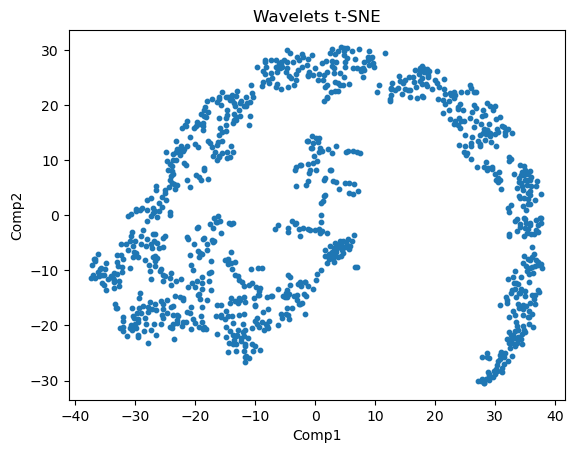

In [12]:
tsne = TSNE(n_components=2)  
wavelets_tsne = tsne.fit_transform(wavelets_flatten)

plt.scatter(wavelets_tsne[:, 0], wavelets_tsne[:, 1], s=10.)
plt.title('Wavelets t-SNE')
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.show()

Doing the same for the force curves.

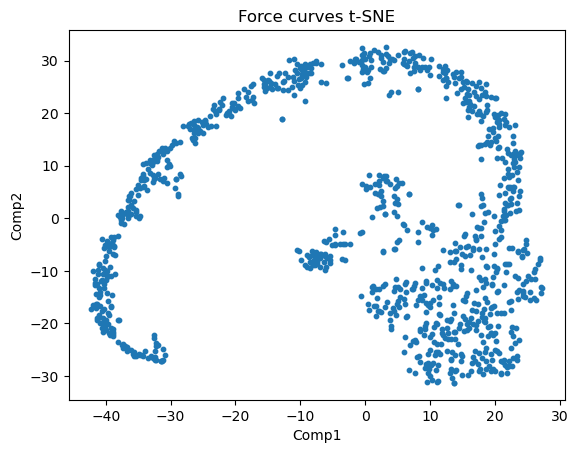

In [13]:
tsne = TSNE(n_components=2)  
curves_tsne = tsne.fit_transform(curves_flatten)

plt.scatter(curves_tsne[:, 0], curves_tsne[:, 1], s=10.)
plt.title('Force curves t-SNE')
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.show()

To visualize the similarities between the previous plots, each data will be normalized by its maximum value, and plotted on the same plane. Note that each data has different components, so the plot only serves as a shape comparison.

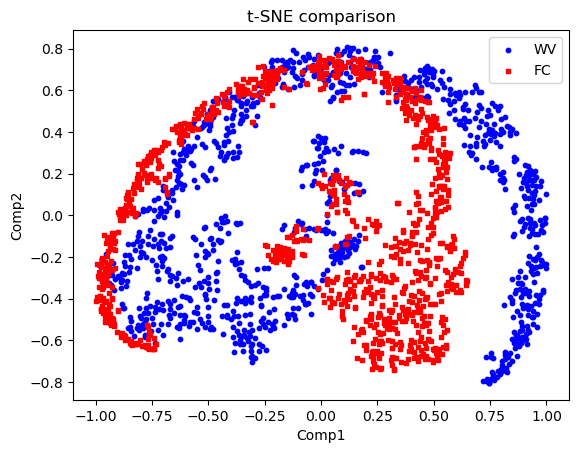

In [14]:
wavelets_tsne /= np.abs(wavelets_tsne).max()
curves_tsne /= np.abs(curves_tsne).max()

plt.scatter(wavelets_tsne[:, 0], wavelets_tsne[:, 1], s=10., c='blue', marker='o', label='WV')
plt.scatter(curves_tsne[:, 0], curves_tsne[:, 1], s=10., c='red', marker='s', label='FC')

plt.legend()
plt.title('t-SNE comparison')
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.show()